In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from pandas import read_csv
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
from pandas.core.reshape.merge import merge
xtrain = read_csv("Xtrain_hgcGIrA.csv")
ytrain = read_csv("Ytrain_yL5OjS4.csv")
xtest = read_csv("Xtest.csv")
ytrain = ytrain.loc[:, ~ytrain.columns.str.contains('^Unnamed')]

In [ ]:
def dropCat(t):
  Xtrain_dropCat = t.copy()
  holdt = pd.DataFrame()
  holdt["type"] = Xtrain_dropCat.dtypes
  #print(holdt)
  holdt["float"] = holdt["type"] == 'float64'
  holdt["int"] =  holdt["type"] == 'int64'
  return Xtrain_dropCat.drop([str(holdt.index[col]) for col in range(0,holdt.shape[0]) if holdt["int"][col] != True and holdt["float"][col] != True], axis=1)

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [p0q0]')
  plt.rcParams['figure.figsize'] = (18, 9)
  plt.legend()
  plt.grid(True)

In [ ]:
def plot_horsepower(x, y):
  plt.scatter(xtrain['p0q1'], ytrain, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

In [ ]:
xtrain = dropCat(xtrain)
xcol = xtrain.columns
imputer = KNNImputer(n_neighbors=3)
xtrain = imputer.fit_transform(xtrain)
xtrain = pd.DataFrame(xtrain)
xtrain.columns = xcol

In [ ]:
X_train, X_validation, Y_train, Y_validation = train_test_split(xtrain, ytrain, test_size=0.20, random_state=1)

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(60)
model=keras.models.Sequential([
    
    keras.layers.Dense(512, input_dim = X_train.shape[1], activation='relu'),  
    keras.layers.Dense(512, input_dim = X_train.shape[1], activation='relu'),  
    keras.layers.Dense(units=256,activation='relu'),  
    keras.layers.Dense(units=256,activation='relu'),    
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dense(units=1, activation="linear"),
],name="Initial_model",)
model.summary()

Model: "Initial_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               5120      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 497,921
Trainable params: 497,921
Non-t

In [ ]:
optimizer = keras.optimizers.Adam()
model.compile(optimizer=optimizer, 
            loss='mean_squared_error')
history = model.fit(X_train, Y_train,
                    epochs=200, batch_size=1024,
                    validation_data=(X_validation, Y_validation), 
                    verbose=1)

Epoch 1/200
25/25 [==============================] - 4s 92ms/step - loss: 0.4901 - val_loss: 0.1275
Epoch 2/200
25/25 [==============================] - 2s 72ms/step - loss: 0.1249 - val_loss: 0.0859
Epoch 3/200
25/25 [==============================] - 2s 73ms/step - loss: 0.0795 - val_loss: 0.1101
Epoch 4/200
25/25 [==============================] - 2s 71ms/step - loss: 0.1235 - val_loss: 0.0707
Epoch 5/200
25/25 [==============================] - 2s 70ms/step - loss: 0.0693 - val_loss: 0.0505
Epoch 6/200
25/25 [==============================] - 2s 82ms/step - loss: 0.0582 - val_loss: 0.0577
Epoch 7/200
25/25 [==============================] - 4s 154ms/step - loss: 0.0510 - val_loss: 0.0484
Epoch 8/200
25/25 [==============================] - 2s 72ms/step - loss: 0.0461 - val_loss: 0.0429
Epoch 9/200
25/25 [==============================] - 2s 71ms/step - loss: 0.0459 - val_loss: 0.0452
Epoch 10/200
25/25 [==============================] - 2s 71ms/step - loss: 0.0450 - val_loss: 0.052

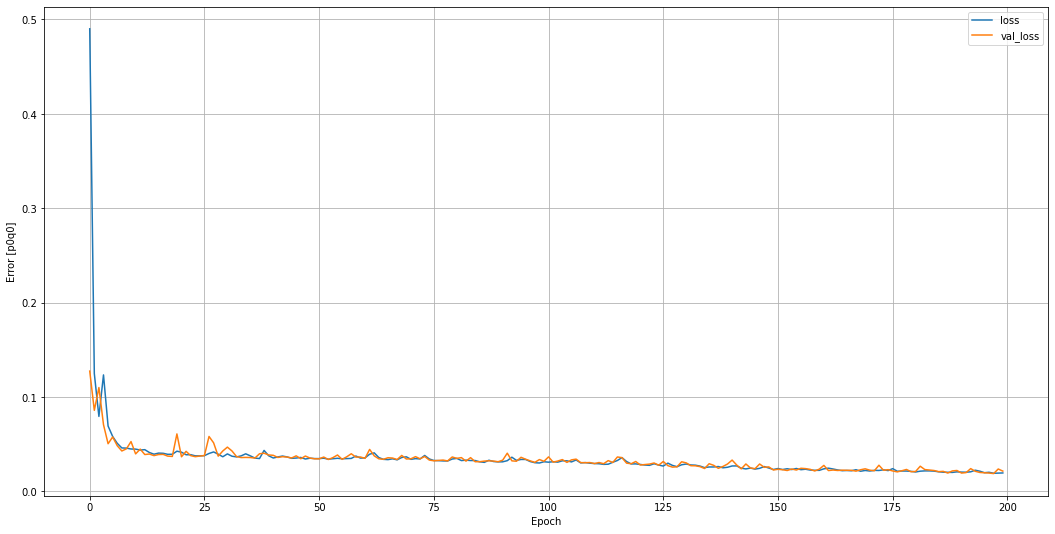

In [ ]:
plot_loss(history)

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(60)
model2=keras.models.Sequential([
    
    keras.layers.Dense(1024, input_dim = X_train.shape[1]), 
    keras.layers.LeakyReLU(),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    
    keras.layers.Dense(512),  
    keras.layers.LeakyReLU(),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
keras.layers.Dense(512),  
    keras.layers.LeakyReLU(),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(units=256), 
    keras.layers.LeakyReLU(),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(units=256), 
    keras.layers.LeakyReLU(),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.01),
keras.layers.Dense(units=128),
    keras.layers.LeakyReLU(), 
    keras.layers.Dropout(0.05),
    keras.layers.Dense(units=1, activation="linear"),
],name="Larger_network",)
model2.summary()

Model: "Larger_network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              10240     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 1024)              0         
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 512)               0         
                                                    

In [ ]:
optimizer = keras.optimizers.Adam()
model2.compile(optimizer=optimizer, 
            loss='mean_squared_error')
history = model2.fit(X_train, Y_train,
                    epochs=200, batch_size=1024,
                    validation_data=(X_validation, Y_validation), 
                    verbose=1)

Epoch 1/200
25/25 [==============================] - 2s 76ms/step - loss: 0.0197 - val_loss: 0.0240
Epoch 2/200
25/25 [==============================] - 2s 71ms/step - loss: 0.0206 - val_loss: 0.0206
Epoch 3/200
25/25 [==============================] - 2s 72ms/step - loss: 0.0210 - val_loss: 0.0211
Epoch 4/200
25/25 [==============================] - 3s 107ms/step - loss: 0.0207 - val_loss: 0.0225
Epoch 5/200
25/25 [==============================] - 2s 87ms/step - loss: 0.0195 - val_loss: 0.0195
Epoch 6/200
25/25 [==============================] - 2s 71ms/step - loss: 0.0201 - val_loss: 0.0206
Epoch 7/200
25/25 [==============================] - 2s 71ms/step - loss: 0.0198 - val_loss: 0.0192
Epoch 8/200
25/25 [==============================] - 2s 71ms/step - loss: 0.0187 - val_loss: 0.0198
Epoch 9/200
25/25 [==============================] - 2s 72ms/step - loss: 0.0195 - val_loss: 0.0201
Epoch 10/200
25/25 [==============================] - 2s 79ms/step - loss: 0.0197 - val_loss: 0.021

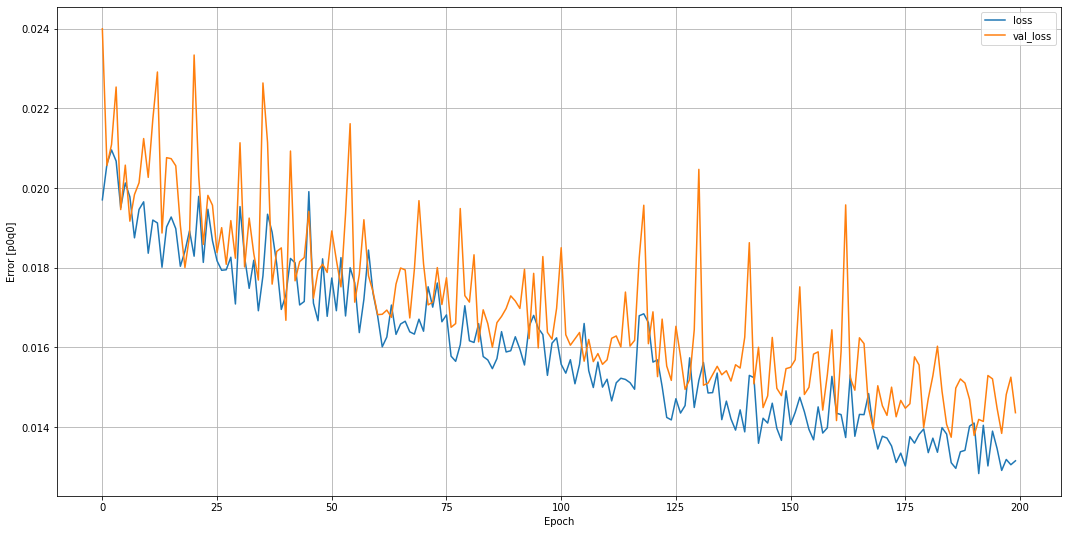

In [ ]:
plot_loss(history)

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.005, weight_decay=5e-4)

In [ ]:
checkpoint_name = 'Weights\Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
history = model2.fit(X_train, Y_train,
                    epochs=500, batch_size=1024,
                    validation_data=(X_validation, Y_validation), 
                    callbacks=callbacks_list, 
                    verbose=1)

Epoch 1/500
25/25 [==============================] - ETA: 0s - loss: 0.5032
Epoch 1: val_loss did not improve from 0.01409
25/25 [==============================] - 9s 219ms/step - loss: 0.5032 - val_loss: 0.0965
Epoch 2/500
25/25 [==============================] - ETA: 0s - loss: 0.1185
Epoch 2: val_loss did not improve from 0.01409
25/25 [==============================] - 6s 261ms/step - loss: 0.1185 - val_loss: 0.0927
Epoch 3/500
25/25 [==============================] - ETA: 0s - loss: 0.0784
Epoch 3: val_loss did not improve from 0.01409
25/25 [==============================] - 5s 208ms/step - loss: 0.0784 - val_loss: 0.0288
Epoch 4/500
25/25 [==============================] - ETA: 0s - loss: 0.0593
Epoch 4: val_loss did not improve from 0.01409
25/25 [==============================] - 6s 257ms/step - loss: 0.0593 - val_loss: 0.0291
Epoch 5/500
25/25 [==============================] - ETA: 0s - loss: 0.0477
Epoch 5: val_loss did not improve from 0.01409
25/25 [======================

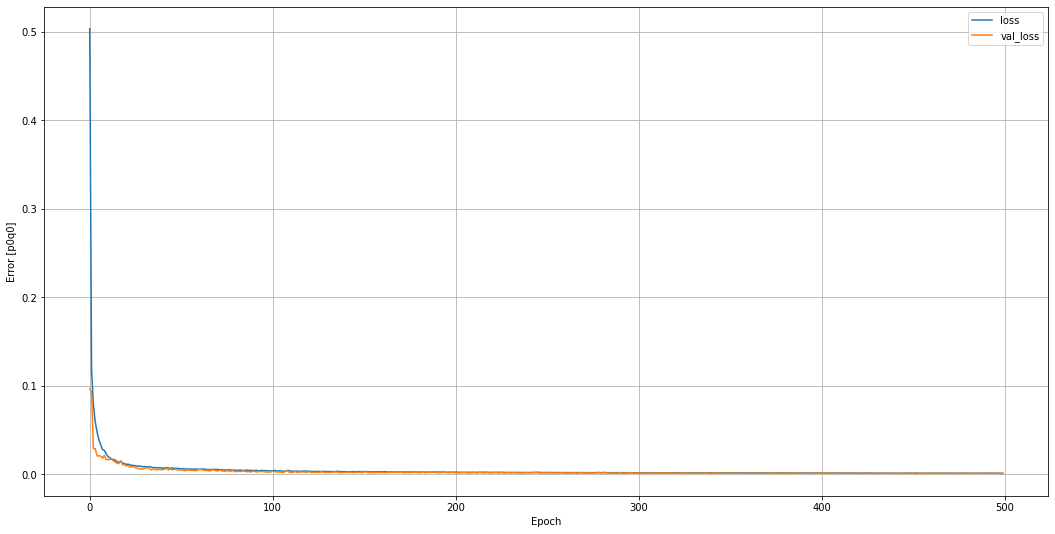

In [ ]:
csv

In [ ]:
Y_predict = model2.predict(X_validation)

195/195 [==============================] - 1s 5ms/step


In [ ]:
[Y_predict, Y_validation]

[array([[0.38654253],
        [0.4377482 ],
        [0.36964843],
        ...,
        [0.29334342],
        [0.10131603],
        [0.31685814]], dtype=float32),         p0q0
 5792   0.412
 16769  0.465
 4658   0.401
 8523   0.078
 11664  0.187
 ...      ...
 29725  0.561
 14262  0.148
 9439   0.303
 14406  0.139
 6377   0.317
 
 [6224 rows x 1 columns]]

In [ ]:
valdata = Y_validation.copy()
valdata["Y_validation"] = valdata["p0q0"]
valdata = valdata.drop("p0q0",axis = 1)
valdata["Y_predict"] = Y_predict
valdata

,Y_validation,Y_predict
5792,0.412,0.386543
16769,0.465,0.437748
4658,0.401,0.369648
8523,0.078,0.083425
11664,0.187,0.188329
...,...,...
29725,0.561,0.533181
14262,0.148,0.148540
9439,0.303,0.293343
14406,0.139,0.101316


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Y_validation', ylabel='Y_predict'>

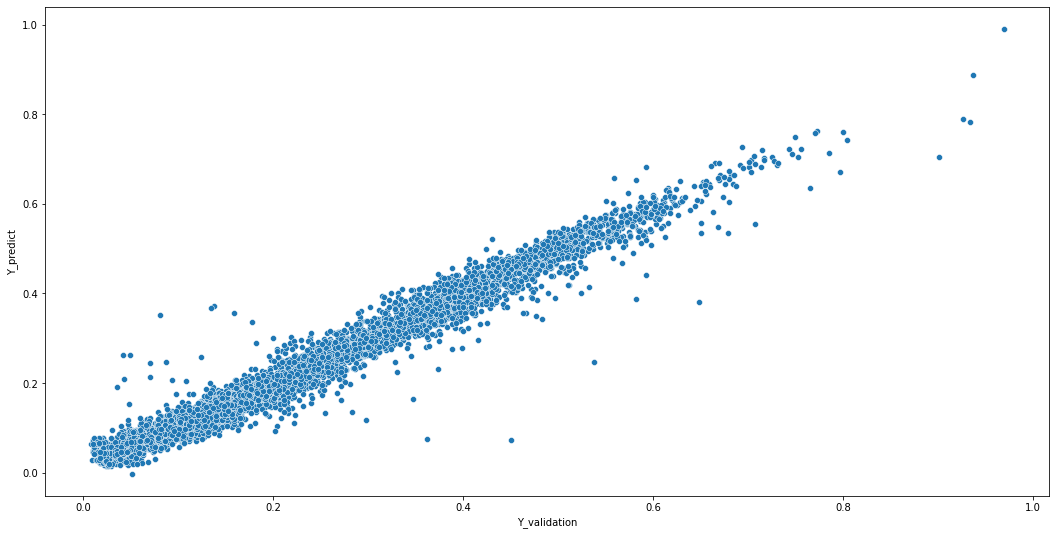

In [ ]:
sns.scatterplot(valdata["Y_validation"], valdata["Y_predict"])

In [ ]:
mean_squared_error(valdata["Y_validation"], valdata["Y_predict"])

0.0007901864852440755

In [ ]:
r2_score(valdata["Y_validation"], valdata["Y_predict"])

0.9681235308497924

In [ ]:
newxtest = pd.DataFrame(dropCat(xtest)).copy()
newnewxtest = imputer.fit_transform(newxtest)
newnewxtest = pd.DataFrame(newnewxtest)
newnewxtest.columns = newxtest.columns

Y_predict2 = model2.predict(newnewxtest)

430/430 [==============================] - 2s 5ms/step


In [1]:
Ypr = pd.DataFrame(Y_predict2).copy()
Ypr.rename(columns = {0:'p0q0'}, inplace = True)
Ypr.index = np.arange(1, len(Ypr) + 1)
Ypr.to_csv("predictionDNN.csv")

NameError: name 'pd' is not defined

---
##Other Stuff

In [ ]:
horsepower = np.array(xtrain['p0q1'])

horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)

In [ ]:
def build_and_compile_model(horsepower_normalizer):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [ ]:
dnn_horsepower_model = build_and_compile_model()

In [ ]:
dnn_horsepower_model.summary()

In [ ]:
%%time
history = dnn_horsepower_model.fit(
    xtrain['p0q1'],
    ytrain,
    validation_split=0.2,
    verbose=0, epochs=100)

In [ ]:
plot_loss(history)

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = dnn_horsepower_model.predict(x)

In [ ]:
plot_horsepower(x, y)

In [ ]:
xtrain['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(
    xtrain['p0q1'], ytrain,
    verbose=0)

In [ ]:
xtrain.head()